# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import folium
import plotly.offline as pyo
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%config Completer.use_jedi = True
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 2. Apa itu PPDB dan apa saja manfaatnya?

PPDB (singkatan dari Penerimaan Peserta Didik Baru) adalah salah satu agenda tahunan penerimaan murid di setiap jenjang sekolah. Metode pendaftaran sekolah melalui daring dari tingkat PAUD, TK, SD, SMP, sampai SMA/SMK. Istilah ini digunakan oleh berbagai sekolah saat ingin menerima murid baru.

Bagi Dinas Pendidikan dan Sekolah:
- Efisiensi pembiayaan dan mengurangi resiko terjadinya KKN (Korupsi, Kolusi dan Nepotisme).
- Meningkatkan reputasi sekolah.
- Memberikan akses yang luas kepada masyarakat.
- Tersedianya sebuah basis data terintegrasi bagi pihak Dinas Pendidikan maupun Sekolah dalam penyelenggaran penerimaan peserta didik baru.

Bagi Siswa dan Orang Tua Siswa:
- Mempermudah untuk melakukan pendafaran siswa baru.
- Mempermudah akses informasi penerimaan siswa baru.
- Pendaftaran menjadi lebih tertib dan mudah dipantau.
- Fasilitas dan pelayanan memuaskan dari pihak Sekolah dan Dinas Pendidikan.

In [2]:
df = pd.read_csv('data_ppdb_revisi.csv')
n = 5
print(df.sample(n))
# sumber data dari https://arsip.siap-ppdb.com/2021/jakarta/#/ dengan mendesain ulang beberapa kolom dan value nya

       Peringkat  Nomer Pendaftaran                          Nama  \
8499         124    200107202690054  GANENDRA DEVEN FEBRIYANDHIKA   
10911         73    200107202390103                RAISYAH HAFIDA   
1226           6    200104200320200                SYIFA SYAFITRI   
4169          27    200102201750107          MUHAMMAD ARYA FAREZY   
10094         18    200107202180098                  SANIA ASHIVA   

           Kelurahan   RW   RT  Prioritas Zonasi               Umur  \
8499    Lubang Buaya  2.0  7.0               3.0  12 th 05 bl 00 hr   
10911  Pejaten Timur  9.0  9.0               3.0  13 th 06 bl 27 hr   
1226       Cililitan  7.0  NaN               NaN  12 th 11 bl 18 hr   
4169        Rambutan  4.0  7.0               NaN  13 th 01 bl 04 hr   
10094    Jati Padang  9.0  6.0               2.0  12 th 05 bl 13 hr   

             Asal SMP Jalur Daftar        Status  
8499   SMP Negeri 272       Zonasi  Daftar Ulang  
10911             239       Zonasi  Daftar Ulang  
1226 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11925 entries, 0 to 11924
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Peringkat          11925 non-null  int64  
 1   Nomer Pendaftaran  11925 non-null  int64  
 2   Nama               11925 non-null  object 
 3   Kelurahan          11832 non-null  object 
 4   RW                 11805 non-null  float64
 5   RT                 8412 non-null   float64
 6   Prioritas Zonasi   7189 non-null   float64
 7   Umur               11925 non-null  object 
 8   Asal SMP           11925 non-null  object 
 9   Jalur Daftar       11925 non-null  object 
 10  Status             11925 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.0+ MB


# 3. Cleaning Data

Pembersihan data adalah salah satu subtugas paling penting dari setiap project seorang data scientist, data analyst, dan data engineer. Meskipun ini bisa menjadi proses yang sangat membosankan, tetapi proses ini tidak boleh diremehkan.

Dengan melihat sampel dari baris kumpulan data (dari tugas di atas), saya mengamati bahwa beberapa value di kolom seperti kolom `Asal SMP` ada value yang tidak teratur dan beda dengan value pada umumnya. Itu baru terlihat di kolom `Asal SMP` belum lagi di kolom yang lainnya.

Oleh karena itu, sekarang kita lanjutkan untuk membersihkan data kita. Khususnya, karakter yang kelebihan space atau ada nama Kelurahan yang typo.

## 3.1 Cleaning Column `Kelurahan`

In [4]:
df['Kelurahan'] = df['Kelurahan'].str.strip() # memangkas value Kelurahan yang kelebihan spasi

In [5]:
df['Kelurahan'].value_counts()

Ciracas               719
Lubang Buaya          585
Kebon Pala            577
Tengah                501
Rambutan              451
                     ... 
Lagoa                   1
cijantung               1
Kedaung Kali Angke      1
Duri Pulo               1
Petogogan               1
Name: Kelurahan, Length: 213, dtype: int64

In [6]:
df['Kelurahan'].replace(['Cilitan', 'cijantung', 'Srengsen Sawah', 'pinang ranti', 'balekambang', 'Cililtan', 'Duri selatan', 'Cilandak Badak', 
                         'Kepala Dua Wetan', 'Cipinang Besar', 'Utan Kayu utara', 'Gedonga', 'Tanjung barat', 'Balekambang'],
                        ['Cililitan', 'Cijantung', 'Srengseng Sawah', 'Pinang Ranti', 'Balekambang', 'Cililitan', 'Duri Selatan', 'Cilandak Barat', 
                         'Kelapa Dua Wetan', 'Cipinang Besar Utara', 'Utan Kayu Utara', 'Gedong', 'Tanjung Barat', 'Bale Kambang'], inplace=True)

## 3.2 Cleaning Column `RW`

In [7]:
df['RW'].value_counts() #tujuannya adalah untuk mencari null value. jika ada null value maka di isi dengan angka 0

3.0     1578
2.0     1555
1.0     1459
4.0     1330
5.0     1035
6.0     1018
9.0      872
7.0      863
10.0     695
8.0      581
11.0     424
12.0     222
15.0      58
13.0      44
14.0      32
16.0      30
17.0       4
18.0       3
19.0       2
Name: RW, dtype: int64

In [8]:
df['RW'] = df['RW'].fillna(0) #null value di isi angka 0 agar tipe datanya bisa diubah dari float menjadi integer

In [9]:
df['RW'] = df['RW'].astype(int) #syntax mengubah tipe data dari float menjadi integer

## 3.3 Cleaning Column `RT`

In [10]:
df['RT'].value_counts() #tujuannya adalah untuk mencari null value. jika ada null value maka di isi dengan angka 0

3.0     769
1.0     742
2.0     711
4.0     709
6.0     701
8.0     695
5.0     687
7.0     685
9.0     545
10.0    500
11.0    477
12.0    361
14.0    250
13.0    245
15.0    148
16.0     94
17.0     59
18.0     25
19.0      9
Name: RT, dtype: int64

In [11]:
df['RT'] = df['RT'].fillna(0) #null value di isi angka 0 agar tipe datanya bisa diubah dari float menjadi integer

In [12]:
df['RT'] = df['RT'].astype(int) #syntax mengubah tipe data dari float menjadi integer

## 3.4 Cleaning Column `Asal SMP`

In [13]:
df['Asal SMP'].value_counts() #melihat nama value yang ada, apakah sudah seragam atau masih berantakan

35                403
SMP Negeri 259    364
281               348
SMP Negeri 257    329
239               329
49                328
SMP Negeri 81     328
SMP Negeri 179    326
SMP Negeri 268    325
SMP Negeri 184    323
20                312
182               294
210               294
150               291
SMP Negeri 106    290
126               290
SMP Negeri 275    289
SMP Negeri 209    286
SMP Negeri 263    256
SMP Negeri 174    255
41                254
218               253
SMP Negeri 80     253
SMP Negeri 272    252
SMP Negeri 214    252
SMP Negeri 171    251
SMP Negeri 222    223
SMP Negeri 102    221
24                221
SMP Negeri 246    220
227               220
SMP Negeri 208    219
154               218
107               218
SMP Negeri 217    218
238               218
SMP Negeri 223    217
SMP Negeri 287    217
SMP Negeri 251    217
SMP Negeri 128    216
163               214
SMP Negeri 103    183
SMP Negeri 203    182
SMP Negeri 188    181
155               181
SMP Negeri

In [14]:
df['Asal SMP'].replace(['SMP Negeri 259', 'SMP Negeri 257', 'SMP Negeri 81', 'SMP Negeri 179', 'SMP Negeri 268', 'SMP Negeri 184', 'SMP Negeri 106', 
                        'SMP Negeri 275', 'SMP Negeri 209', 'SMP Negeri 263', 'SMP Negeri 174', 'SMP Negeri 80', 'SMP Negeri 272', 'SMP Negeri 214',
                        'SMP Negeri 171', 'SMP Negeri 222', 'SMP Negeri 102', 'SMP Negeri 246', 'SMP Negeri 208', 'SMP Negeri 217', 'SMP Negeri 251',
                        'SMP Negeri 287', 'SMP Negeri 223', 'SMP Negeri 128', 'SMP Negeri 103', 'SMP Negeri 203', 'SMP Negeri 188', 'SMP Negeri 50']
                       ,[259, 257, 81, 179, 268, 184, 106, 275, 209, 263, 174, 80, 272, 214, 171, 222, 102, 246, 208, 217, 251, 287, 223, 128, 103, 203, 188, 50], inplace=True)

In [15]:
df['Asal SMP'].value_counts() # memastikan kembali apakah value sudah seragam atau belum

35     403
259    364
281    348
257    329
239    329
49     328
81     328
179    326
268    325
184    323
20     312
182    294
210    294
150    291
106    290
126    290
275    289
209    286
263    256
174    255
41     254
218    253
80     253
272    252
214    252
171    251
222    223
102    221
24     221
246    220
227    220
208    219
154    218
107    218
217    218
238    218
223    217
287    217
251    217
128    216
163    214
103    183
203    182
188    181
155    181
50     146
Name: Asal SMP, dtype: int64

## 3.5 Cleaning Column `Jalur Daftar`

In [16]:
df['Jalur Daftar'].value_counts() #melihat nama value yang ada, apakah sudah seragam atau masih berantakan

Zonasi                               5685
KJP                                  1663
Akademik                             1576
Afirmasi (KJP)                        632
Tahap Kedua                           478
Prestasi (Akademik)                   477
Non Akademik                          443
KJP                                   432
Prestasi (Non Akademik)               133
Inklusi                               114
Afirmasi (Inklusi)                     61
Akademik                               58
Pindah Tugas Orangtua                  56
Jalur Kedua                            44
Pindah Tugas Orangtua & Anak Guru      28
Inklusi                                14
Non Akademik                           12
Pindahan Tugas Orangtua                 9
Tahap Kedua                             9
Afirmasi (Anak Panti)                   1
Name: Jalur Daftar, dtype: int64

In [17]:
df['Jalur Daftar'] = df['Jalur Daftar'].str.strip() #memangkas kelebihan spasi. karena berdasarkan hasil value counts ada 2 value KJP yang sama

In [18]:
df['Jalur Daftar'].value_counts() #memastikan kembali apakah ada yang masih kelebihan spasi atau tidak

Zonasi                               5685
KJP                                  2095
Akademik                             1634
Afirmasi (KJP)                        632
Tahap Kedua                           487
Prestasi (Akademik)                   477
Non Akademik                          455
Prestasi (Non Akademik)               133
Inklusi                               128
Afirmasi (Inklusi)                     61
Pindah Tugas Orangtua                  56
Jalur Kedua                            44
Pindah Tugas Orangtua & Anak Guru      28
Pindahan Tugas Orangtua                 9
Afirmasi (Anak Panti)                   1
Name: Jalur Daftar, dtype: int64

In [19]:
df['Jalur Daftar'].replace(['KJP', 'Akademik', 'Non Akademik', 'Inklusi', 'Pindah Tugas Orangtua', 'Pindahan Tugas Orangtua', 'Jalur Kedua'], 
                           ['Afirmasi (KJP)', 'Prestasi (Akademik)', 'Prestasi (Non Akademik)', 'Afirmasi (Inklusi)', 'Pindah Tugas Orangtua & Anak Guru', 
                            'Pindah Tugas Orangtua & Anak Guru', 'Tahap Kedua'], inplace=True)
# mengubah nama value sesuai dengan PPDB DKI Jakarta

In [20]:
df['Jalur Daftar'].value_counts() # memastikan kembali apakah value sudah sesuai dengan PPDB DKI Jakarta atau belum

Zonasi                               5685
Afirmasi (KJP)                       2727
Prestasi (Akademik)                  2111
Prestasi (Non Akademik)               588
Tahap Kedua                           531
Afirmasi (Inklusi)                    189
Pindah Tugas Orangtua & Anak Guru      93
Afirmasi (Anak Panti)                   1
Name: Jalur Daftar, dtype: int64

## 3.6 Cleaning Column `Status`

In [21]:
df['Status'].value_counts()

Daftar Ulang          11602
Tidak Daftar Ulang      179
Daftar Ulang            137
Pindah sekolah            3
Pindah Ke 49              3
Tidak Naik Kelas          1
Name: Status, dtype: int64

In [22]:
df['Status'] = df['Status'].str.strip() # memangkas kelebihan spasi berdasarkan value Daftar Ulang

In [23]:
df['Status'].replace(['Pindah sekolah'],['Pindah Sekolah'], inplace=True) # value Pindah Sekolah, huruf s pada sekolah masih huruf kecil bukan kapital

In [24]:
df['Status'].value_counts() # memastikan kembali apakah value sudah sesuai dengan kemauan pribadi atau belum
# sumber data pindah sekolah & pindah ke 49 di dapatkan dari teman adik yang memang saling kenal sehingga data yang didapatkan valid

Daftar Ulang          11739
Tidak Daftar Ulang      179
Pindah Sekolah            3
Pindah Ke 49              3
Tidak Naik Kelas          1
Name: Status, dtype: int64

## 3.7 Memastikan apakah tipe data sudah tepat atau belum

In [25]:
df.dtypes

Peringkat              int64
Nomer Pendaftaran      int64
Nama                  object
Kelurahan             object
RW                     int32
RT                     int32
Prioritas Zonasi     float64
Umur                  object
Asal SMP              object
Jalur Daftar          object
Status                object
dtype: object

# 4. Klasifikasi zonasi berdasarkan zonasi 1, zonasi 2, dan zonasi 3

Untuk Memudahkan analisa, alangkah baiknya membuat kolom baru yang valuenya hanya berisi `Zonasi 1`, `Zonasi 2`, `Zonasi 3`, dan `Belum Diketahui`. Tujuannya adalah untuk mengetahui siapa saja yang sudah masuk di `zonasi 1 dan 2`. Jika sudah didapatkan nama-nama yang masuk kedalam `zonasi 1 dan 2`, maka kemungkinan besar mereka tidak akan memilih sekolah yang diluar cakupannya yaitu `zonasi 3`. Kecuali jika nama-nama tersebut mendaftar melalui `jalur prestasi` atau `jalur afirmasi`.

In [26]:
df_51 = df[df['Kelurahan'].isin(['Batu Ampar', 'Bale Kambang', 'Pejaten Barat', 'Pejaten Timur', 'Cawang', 'Cililitan', 'Gedong', 'Rawajati', 
                         'Kalibata', 'Kramat Jati', 'Tengah'])].sort_values('Umur', ascending=False).reset_index()
df_51.head()

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
0,398,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,20,Afirmasi (Inklusi),Daftar Ulang
1,996,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,126,Afirmasi (Inklusi),Daftar Ulang
2,2269,8,200107200590084,ARVA SABILLILAH,Cililitan,7,12,3.0,14 th 11 bl 13 hr,50,Zonasi,Daftar Ulang
3,252,15,200102200060218,ANGGI PRATIWI,Kramat Jati,11,10,2.0,14 th 10 bl 29 hr,49,Afirmasi (KJP),Tidak Naik Kelas
4,5678,46,200102202100027,MUHAMAD ISLAMI,Tengah,4,11,NaN,14 th 10 bl 27 hr,209,Afirmasi (KJP),Daftar Ulang


In [31]:
status_zonasi = []
for x,y,z in zip(df_51['RT'], df_51['RW'], df_51['Kelurahan']):
    if x in [12, 15, 7, 11, 11, 10, 9 ,14] and y == [2, 5, 4, 4, 2, 2, 2, 2] and z == ['Batu Ampar']:
        c = 'Zonasi 1'
    elif x in [1, 9 , 6, 5, 8, 15, 17, 1, 10, 13, 4, 6, 12] and y == [4, 3, 5, 5, 2, 2, 2, 6, 4, 4, 4, 4, 4] and z == ['Batu Ampar']:
        c = 'Zonasi 2'
    else:
        c = 'Zonasi 3'
    status_zonasi.append(c)

In [32]:
df_51['Status Zonasi'] = status_zonasi

In [34]:
df_51['Status Zonasi'].value_counts()

Zonasi 3    3596
Name: Status Zonasi, dtype: int64

In [27]:
# Membuat kolom baru dengan keterangan value nya 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Bale Kambang'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Bale Kambang'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Bale Kambang'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Bale Kambang'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Bale Kambang'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Pejaten Barat'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Pejaten Barat'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Pejaten Barat'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Pejaten Barat'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Pejaten Barat'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Pejaten Timur'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Pejaten Timur'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Pejaten Timur'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Pejaten Timur'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Pejaten Timur'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Cililitan'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Cililitan'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Cililitan'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Cililitan'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Cililitan'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Gedong'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Gedong'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Gedong'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Gedong'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Gedong'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Rawajati'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Rawajati'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Rawajati'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Rawajati'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Rawajati'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Kalibata'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Kalibata'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Kalibata'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Kalibata'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Kalibata'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Kramat Jati'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Kramat Jati'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Kramat Jati'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Kramat Jati'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Kramat Jati'), 'Status Zonasi'] = 'Belum Diketahui'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Akademik)') & (df_51['Kelurahan'] == 'Tengah'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Prestasi (Non Akademik)') & (df_51['Kelurahan'] == 'Tengah'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Inklusi)') & (df_51['Kelurahan'] == 'Tengah'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (Anak Panti)') & (df_51['Kelurahan'] == 'Tengah'), 'Status Zonasi'] = 'Belum Diketahui'
df_51.loc[(df_51['Jalur Daftar'] == 'Tahap Kedua') & (df_51['Kelurahan'] == 'Tengah'), 'Status Zonasi'] = 'Belum Diketahui'

In [35]:
status_zonasi = []
for x,y,z in zip(df_51['RT'], df_51['RW'], df_51['Kelurahan']):
    if x in [12, 15, 7, 11, 11, 10, 9 ,14] and y == [2, 5, 4, 4, 2, 2, 2, 2] and z == ['Batu Ampar']:
        c = 'Zonasi 1'
    elif x in [1, 9 , 6, 5, 8, 15, 17, 1, 10, 13, 4, 6, 12] and y == [4, 3, 5, 5, 2, 2, 2, 6, 4, 4, 4, 4, 4] and z == ['Batu Ampar']:
        c = 'Zonasi 2'
    else:
        c = 'Zonasi 3'
    status_zonasi.append(c)

In [38]:
df_51['Status Zonasi'].value_counts()

Zonasi 3           2595
Belum Diketahui     935
Zonasi 2             46
Zonasi 1             20
Name: Status Zonasi, dtype: int64

In [28]:
# Membuat kolom baru dengan keterangan value nya ZONASI 3
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Bale Kambang'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Bale Kamabang'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Kramat Jati'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Kramat Jati'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Pejaten Barat'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Pejaten Barat'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Pejaten Timur'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Pejaten Timur'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Cililitan'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Cililitan'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Gedong'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Gedong'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Cawang'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Tengah'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Tengah'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Kalibata'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Kalibata'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Rawajati'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Rawajati'), 'Status Zonasi'] = 'Zonasi 3'
    
df_51.loc[(df_51['Jalur Daftar'] == 'Zonasi') & (df_51['Kelurahan'] == 'Bale Kambang'), 'Status Zonasi'] = 'Zonasi 3'
df_51.loc[(df_51['Jalur Daftar'] == 'Afirmasi (KJP)') & (df_51['Kelurahan'] == 'Bale Kambang'), 'Status Zonasi'] = 'Zonasi 3'

In [29]:
# Membuat kolom baru dengan keterangan value nya 'zonasi 1' dan 'zonasi 2'
df_51.loc[(df_51['RT'] == 12) & (df_51['RW'] == 2) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 1'
df_51.loc[(df_51['RT'] == 15) & (df_51['RW'] == 5) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 1'
df_51.loc[(df_51['RT'] == 7) & (df_51['RW'] == 4) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 1'
df_51.loc[(df_51['RT'] == 11) & (df_51['RW'] == 4) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 1'
df_51.loc[(df_51['RT'] == 11) & (df_51['RW'] == 2) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 1'
df_51.loc[(df_51['RT'] == 10) & (df_51['RW'] == 2) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 1'
df_51.loc[(df_51['RT'] == 9) & (df_51['RW'] == 2) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 1'
df_51.loc[(df_51['RT'] == 14) & (df_51['RW'] == 2) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 1'

df_51.loc[(df_51['RT'] == 1) & (df_51['RW'] == 4) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 9) & (df_51['RW'] == 3) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 6) & (df_51['RW'] == 5) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 5) & (df_51['RW'] == 5) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 8) & (df_51['RW'] == 2) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 15) & (df_51['RW'] == 2) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 17) & (df_51['RW'] == 2) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 1) & (df_51['RW'] == 6) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 10) & (df_51['RW'] == 4) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 13) & (df_51['RW'] == 4) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 4) & (df_51['RW'] == 4) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 6) & (df_51['RW'] == 4) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'
df_51.loc[(df_51['RT'] == 12) & (df_51['RW'] == 4) & (df_51['Kelurahan'] == 'Batu Ampar'), 'Status Zonasi'] = 'Zonasi 2'

# 5. Analisa

Setelah data sudah benar-benar bersih, maka langkah selanjutnya adalah analisa. CPDB(Calon Peserta Didik Baru) atas nama Tyas Adira Rahayu Ningsih kira-kira ada diurutan ke berapa jika masuk di salah 1 SMA Negeri yang masih 1 zonasi dengan kelurahannya. Adapun aturannya akan dijelaskan dibawah ini.

A) Seleksi pada jalur zonasi sebagai berikut:
1. Zona prioritas pertama diperuntukkan bagi CPDB yang berdomisili di RT yang sama dengan RT lokasi sekolah dan CPDB yang berdomisili di RT yang berbatasan langsung / bersinggungan dengan RT lokasi sekolah.
2. Zona prioritas kedua diperuntukkan bagi CPDB yang berdomisili di RT pada sekitar sekolah berdasarkan pemetaan.
3. Zona prioritas ketiga diperuntukkan bagi CPDB yang berdomisili sama dan atau berdekatan dengan kelurahan sekolah (info lebih lanjut bisa baca di (https://berkas-jkt.siap-ppdb.com/jakarta/juknis.220612235857.pdf))

B) Dalam hal jumlah CPDB yang mendaftar melalui zonasi melebihi daya tampung, maka dilakukan seleksi dengan urutan langkah sebagai berikut:
1. Zona prioritas
2. Usia dari yang tertua ke yang termuda
3. Urutan pilihan sekolah
4. Waktu Mendaftar

Sebagai informasi, bahwasanya CPDB atas nama Tyas Adira Rahayu Ningsih telah gagal dalam seleksi di `Jalur Prestasi` serta tidak bisa mendaftar di `Jalur Afirmasi(KJP)` dikarenakan tidak memiliki KJP. Jadi peluang untuk masuk SMA negeri masih ada karena data yang dipakai adalah data anak SMP yang bersekolah di SMP wilayah Jakarta Timur

## 4.1 Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 51 Jakarta

In [30]:
df_51.loc[df_51['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)] # melihat di posisi berapa value dari kolom Nama yaitu Tyas Adira Rahayu Ningsih

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status,Status Zonasi
1249,63,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,49,Zonasi,Daftar Ulang,Zonasi 3


In [31]:
df_51.loc[df_51['Status Zonasi'].isnull()] # Untuk mengetahui baris mana yang memiliki NaN di kolom tertentu

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status,Status Zonasi


In [32]:
df_51['Status Zonasi'].value_counts() # untuk mengetahui siapa saja yang masuk ke dalam zonasi 1 dan zonasi 2

Zonasi 3           2595
Belum Diketahui     935
Zonasi 2             46
Zonasi 1             20
Name: Status Zonasi, dtype: int64

In [33]:
df_51[df_51['Status Zonasi'].isin(['Zonasi 1', 'Zonasi 2'])] # syntax ngecek siapa saja yang masuk zonasi 1 dan zonasi 2

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status,Status Zonasi
107,1092,26,200107201280058,BAGAS SETIAWAN,Batu Ampar,5,15,3.0,14 th 00 bl 09 hr,126,Zonasi,Daftar Ulang,Zonasi 1
140,1094,28,200107201280063,RIAN FADILAH,Batu Ampar,2,8,3.0,13 th 10 bl 21 hr,126,Zonasi,Daftar Ulang,Zonasi 2
294,471,69,200102200320052,REISYA AULIA PUTRI,Batu Ampar,4,10,3.0,13 th 06 bl 04 hr,20,Afirmasi (KJP),Daftar Ulang,Zonasi 2
369,510,37,200107200320119,FARHAN AKBAR PEBRIANSYAH,Batu Ampar,4,6,3.0,13 th 04 bl 26 hr,20,Zonasi,Daftar Ulang,Zonasi 2
384,1036,36,200102201280001,YOGA FEBRYANSYAH,Batu Ampar,2,9,3.0,13 th 04 bl 19 hr,126,Afirmasi (KJP),Daftar Ulang,Zonasi 1
460,1110,44,200107201280099,SAFANI PARI,Batu Ampar,2,11,3.0,13 th 03 bl 21 hr,126,Zonasi,Daftar Ulang,Zonasi 1
462,1111,45,200107201280131,AMELIA ZAHRA EDWIN PUTRI,Batu Ampar,2,17,3.0,13 th 03 bl 21 hr,126,Zonasi,Daftar Ulang,Zonasi 2
472,1112,46,200107201280077,LIDYA PUSPITA,Batu Ampar,2,14,3.0,13 th 03 bl 19 hr,126,Zonasi,Daftar Ulang,Zonasi 1
486,1114,48,200107201280148,SYAFIQ MILHAN,Batu Ampar,4,4,3.0,13 th 03 bl 13 hr,126,Zonasi,Daftar Ulang,Zonasi 2
491,1115,49,200107201280117,MUHAMAD RAIHAN ASHARI,Batu Ampar,4,13,3.0,13 th 03 bl 12 hr,126,Zonasi,Daftar Ulang,Zonasi 2


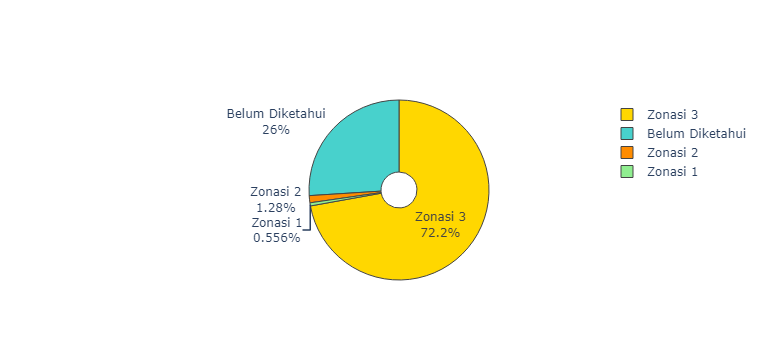

In [34]:
status_pie = df_51['Status Zonasi'].value_counts()
labels = status_pie.index
values = status_pie.values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', hole=.2,
                             marker_colors = colors, marker_line_width=1, marker_line_color='dark red')])

fig.show()

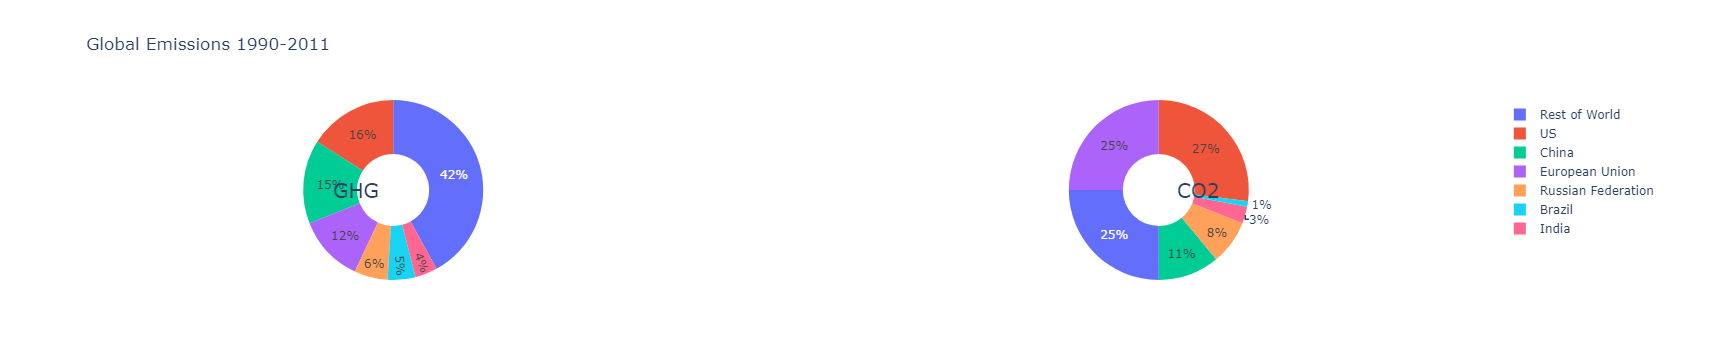

In [37]:
status_51 = df_51[]
status_62 =
status_93 =
status_104 =
status_14 =

labels_51 = 
labels_62 =
labels_93 =
labels_104 = 
labels_14 = 

values_51 = 
values_62 =
values_93 =
values_104 =
values_14 =

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[16, 15, 12, 6, 5, 4, 42], name="GHG Emissions"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[27, 11, 25, 8, 1, 3, 25], name="CO2 Emissions"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Global Emissions 1990-2011",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

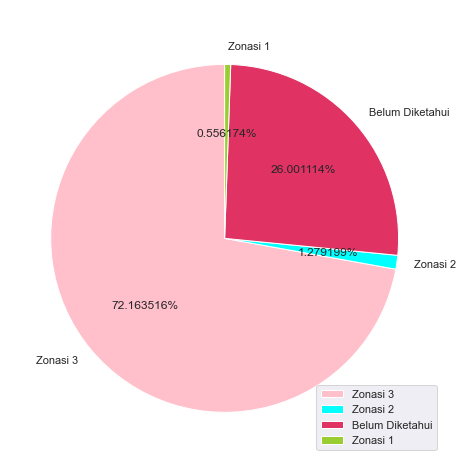

In [35]:
#visualisasi kolom status zonasi dengan menampilkan persentasenya

kategori = ['Zonasi 3', 'Zonasi 2', 'Belum Diketahui', 'Zonasi 1']
data = [2595, 46, 935, 20]
explode = [0, 0, 0, 0]
warna =['pink', 'cyan', '#e03364', 'yellowgreen']
#colors = sns.color_palette('bright')

plt.pie(data,
       labels=kategori,
       colors=warna,
       autopct='%0f%%',
       startangle=90,
       explode=explode)

sns.set_theme()
rcParams['figure.figsize'] = 15,8
plt.legend(loc='lower right')
plt.title('Pembagian Status Zonasi', color='white')
plt.show()

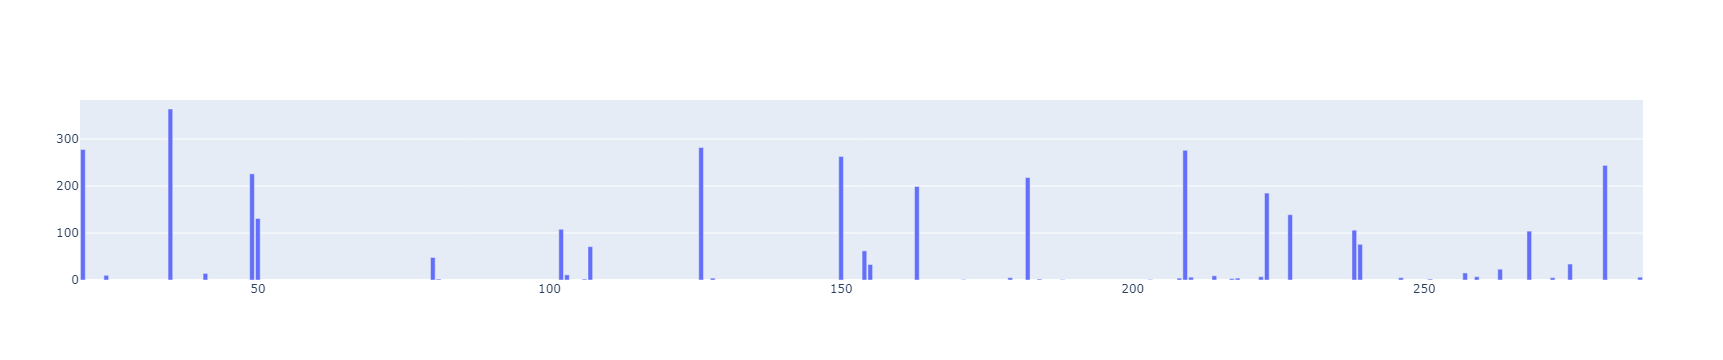

In [119]:
asalsmp = df_51['Asal SMP'].value_counts()

asalsmp_visual = [go.Bar(
                 x = asalsmp.index,
                 y = asalsmp.values,

)]
plotly.offline.iplot(asalsmp_visual)

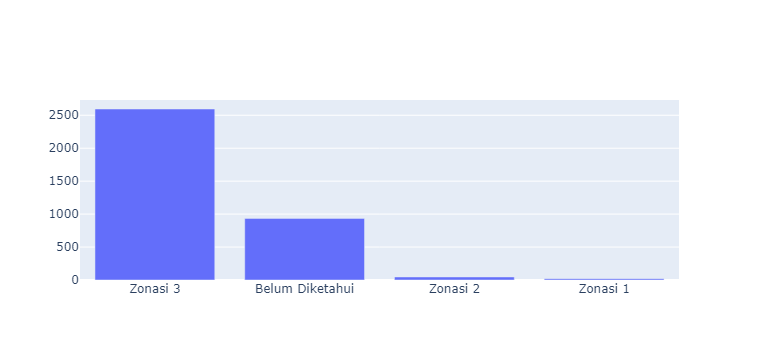

In [111]:
status = df_51['Status Zonasi'].value_counts()

visual = [go.Bar(
         x = status.index,
         y = status.values,
         
)]
plotly.offline.iplot(visual)

## Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 62 Jakarta

In [33]:
df_62 = df[df['Kelurahan'].isin(['Kramat Jati', 'Dukuh', 'Bale Kambang', 'Batu Ampar', 'Cawang', 'Cililitan', 'Rambutan', 'Gedong', 
                                 'Pinang Ranti', 'Kebon Pala', 'Tengah'])].sort_values('Umur', ascending=False).reset_index()

In [41]:
df_62

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
0,398,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,20,Afirmasi (Inklusi),Daftar Ulang
1,1635,17,200102200360004,MUZAKY HISBULLAH WIDIANTO,Dukuh,5,9,3.0,14 th 11 bl 29 hr,24,Afirmasi (KJP),Daftar Ulang
2,996,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,126,Afirmasi (Inklusi),Daftar Ulang
3,8381,6,200107202690014,KURNIAWAN DIANSAH,Pinang Ranti,1,2,3.0,14 th 11 bl 16 hr,272,Zonasi,Daftar Ulang
4,2269,8,200107200590084,ARVA SABILLILAH,Cililitan,7,12,3.0,14 th 11 bl 13 hr,50,Zonasi,Daftar Ulang
...,...,...,...,...,...,...,...,...,...,...,...,...
4345,5379,32,200104201890082,NAUFAL HADI ADITYA,Rambutan,4,0,NaN,11 th 03 bl 20 hr,208,Prestasi (Akademik),Daftar Ulang
4346,5691,59,200102202100046,REZA DWI PERMANA,Tengah,7,6,NaN,11 th 01 bl 09 hr,209,Afirmasi (KJP),Daftar Ulang
4347,6991,9,200104202230079,ANANDA ZHAKI IBRAHIM,Gedong,3,0,NaN,11 th 00 bl 18 hr,257,Prestasi (Akademik),Daftar Ulang
4348,937,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,126,Prestasi (Akademik),Tidak Daftar Ulang


In [42]:
df_62.loc[df_62['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)] # melihat di posisi berapa value dari kolom Nama yaitu Tyas Adira Rahayu Ningsih

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
1413,63,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,49,Zonasi,Daftar Ulang


## Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 93 Jakarta

In [34]:
df_93 = df[df['Kelurahan'].isin(['Tengah', 'Rambutan', 'Tanjung Barat', 'Bale Kambang', 'Batu Ampar', 'Dukuh', 'Susukan', 
                                   'Pinang Ranti', 'Lubang Buaya', 'Kramat Jati', 'Cililitan', 'Gedong'])].sort_values('Umur', ascending=False).reset_index()

In [44]:
df_93

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
0,398,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,20,Afirmasi (Inklusi),Daftar Ulang
1,1635,17,200102200360004,MUZAKY HISBULLAH WIDIANTO,Dukuh,5,9,3.0,14 th 11 bl 29 hr,24,Afirmasi (KJP),Daftar Ulang
2,996,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,126,Afirmasi (Inklusi),Daftar Ulang
3,8381,6,200107202690014,KURNIAWAN DIANSAH,Pinang Ranti,1,2,3.0,14 th 11 bl 16 hr,272,Zonasi,Daftar Ulang
4,2269,8,200107200590084,ARVA SABILLILAH,Cililitan,7,12,3.0,14 th 11 bl 13 hr,50,Zonasi,Daftar Ulang
...,...,...,...,...,...,...,...,...,...,...,...,...
4780,5691,59,200102202100046,REZA DWI PERMANA,Tengah,7,6,NaN,11 th 01 bl 09 hr,209,Afirmasi (KJP),Daftar Ulang
4781,6991,9,200104202230079,ANANDA ZHAKI IBRAHIM,Gedong,3,0,NaN,11 th 00 bl 18 hr,257,Prestasi (Akademik),Daftar Ulang
4782,937,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,126,Prestasi (Akademik),Tidak Daftar Ulang
4783,11024,11,200104201830335,MUHAMMAD SYAHMI TRIHANDOKO,Tanjung Barat,5,0,NaN,10 th 09 bl 07 hr,154,Prestasi (Akademik),Daftar Ulang


In [45]:
df_93.loc[df_93['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
1709,63,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,49,Zonasi,Daftar Ulang


## Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 104 Jakarta

In [35]:
df_104 = df[df['Kelurahan'].isin(['Gedong', 'Rambutan', 'Susukan', 'Dukuh', 'Tanjung Barat', 'Bale Kambang', 'Batu Ampar', 
                                  'Jati Padang', 'Tengah', 'Baru', 'Pejaten Timur', 
                                  'Pasar Minggu', 'Cijantung'])].sort_values('Umur', ascending=False).reset_index()

In [47]:
df_104

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
0,398,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,20,Afirmasi (Inklusi),Daftar Ulang
1,1635,17,200102200360004,MUZAKY HISBULLAH WIDIANTO,Dukuh,5,9,3.0,14 th 11 bl 29 hr,24,Afirmasi (KJP),Daftar Ulang
2,10077,1,200107202180018,AHMAD FAJRI,Jati Padang,8,6,1.0,14 th 11 bl 24 hr,218,Zonasi,Daftar Ulang
3,996,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,126,Afirmasi (Inklusi),Daftar Ulang
4,5678,46,200102202100027,MUHAMAD ISLAMI,Tengah,4,11,NaN,14 th 10 bl 27 hr,209,Afirmasi (KJP),Daftar Ulang
...,...,...,...,...,...,...,...,...,...,...,...,...
4492,6991,9,200104202230079,ANANDA ZHAKI IBRAHIM,Gedong,3,0,NaN,11 th 00 bl 18 hr,257,Prestasi (Akademik),Daftar Ulang
4493,937,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,126,Prestasi (Akademik),Tidak Daftar Ulang
4494,4389,54,200104201070065,FATUR DWI AGENG SELO,Baru,1,0,NaN,11 th 00 bl 00 hr,179,Prestasi (Akademik),Daftar Ulang
4495,11024,11,200104201830335,MUHAMMAD SYAHMI TRIHANDOKO,Tanjung Barat,5,0,NaN,10 th 09 bl 07 hr,154,Prestasi (Akademik),Daftar Ulang


In [48]:
df_104.loc[df_104['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
1679,63,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,49,Zonasi,Daftar Ulang


## Menganalisa diurutan keberapa jika mendaftar di SMA Negeri 14 Jakarta

In [36]:
df_14 = df[df['Kelurahan'].isin(['Cililitan', 'Cawang', 'Rawajati', 'Pejaten Barat', 'Pejaten Timur', 'Bale Kambang', 
                                 'Batu Ampar', 'Dukuh', 'Kebon Pala', 'Makasar', 'Pancoran', 'Pengadegan', 
                                 'Kramat Jati', 'Cikoko', 'Duren Tiga', 'Kalibata', 'Kebon Baru'])].sort_values('Umur', ascending=False).reset_index()

In [50]:
df_14

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
0,398,1,200103200320003,MUHAMMAD ABDUL RAHMAN,Batu Ampar,4,0,3.0,15 th 00 bl 28 hr,20,Afirmasi (Inklusi),Daftar Ulang
1,1635,17,200102200360004,MUZAKY HISBULLAH WIDIANTO,Dukuh,5,9,3.0,14 th 11 bl 29 hr,24,Afirmasi (KJP),Daftar Ulang
2,996,1,200103201280002,TRI ZAHRINI,Batu Ampar,0,0,3.0,14 th 11 bl 23 hr,126,Afirmasi (Inklusi),Daftar Ulang
3,2269,8,200107200590084,ARVA SABILLILAH,Cililitan,7,12,3.0,14 th 11 bl 13 hr,50,Zonasi,Daftar Ulang
4,252,15,200102200060218,ANGGI PRATIWI,Kramat Jati,11,10,2.0,14 th 10 bl 29 hr,49,Afirmasi (KJP),Tidak Naik Kelas
...,...,...,...,...,...,...,...,...,...,...,...,...
4462,11128,11,200107201550102,FELICIA BARUNA PUTRI NUR,Pengadegan,5,2,2.0,11 th 03 bl 26 hr,154,Zonasi,Daftar Ulang
4463,11332,17,200107201560059,ANDIKA JAHDAN TAZAKKA,Cikoko,5,3,2.0,11 th 03 bl 02 hr,155,Zonasi,Daftar Ulang
4464,11571,22,200107201640050,YUANITA VERA FIRDAYANTI,Kalibata,8,4,2.0,11 th 00 bl 11 hr,182,Zonasi,Daftar Ulang
4465,937,7,200104201280204,ZIYAD TRYSTAN RABBANI SARWONO,Batu Ampar,4,0,NaN,11 th 00 bl 03 hr,126,Prestasi (Akademik),Tidak Daftar Ulang


In [51]:
df_14.loc[df_14['Nama'].str.contains('Tyas Adira Rahayu Ningsih', case=False)]

,index,Peringkat,Nomer Pendaftaran,Nama,Kelurahan,RW,RT,Prioritas Zonasi,Umur,Asal SMP,Jalur Daftar,Status
1441,63,64,200107200060003,TYAS ADIRA RAHAYU NINGSIH,Batu Ampar,5,7,3.0,12 th 11 bl 11 hr,49,Zonasi,Daftar Ulang


In [52]:
df_51.to_excel('data_ppdb_sma51.xlsx')